根据泊松方程  
$$\frac{\partial^2 \phi}{\partial x^2}+\frac{\partial^2 \phi}{\partial y^2}=q(x,y)$$
可以得到如下差分方程  
$$\phi_{ij}=\frac{1}{4}(\phi_{i-1,j}+\phi_{i+1,j}+\phi_{i,j-1}+\phi_{i,j+1}-h^2 q_{ij})$$
假设求解区域共有N个点，则可以写出N个差分方程  
这些差分方程中的每一个$\phi$都是是需要求解的N个$\phi_{ij}$之一或者边界上已知的函数值  
因此联立含有N个未知数的N个方程，就可以求解$\phi_{ij}$  
为了方便表述，下文中将方程组用矩阵的形式表示  
$$Ax=b$$
其中$A$为系数矩阵，$x$为解向量，$b$为常数向量

用有限差分法计算方程的数值解  
$$
\left \{
    {\begin{array}{cc}
        \frac{\partial^2 \phi}{\partial x^2}+\frac{\partial^2 \phi}{\partial y^2}=0,0\leq x,y\leq1 \\
        \phi(x,0)=\phi(x,1)=0,\phi(0,y)=\phi(1,y)=1 \\
    \end{array}}
\right .
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

首先，对求解区域进行划分，并标出求解区域的边界点和求解区域内的点

In [2]:
# 求解区域的范围
x_range = [0.0, 1.0]
y_range = [0.0, 1.0]

# 划分的步长
h = 0.1

# 每一个点的坐标
x = np.arange(x_range[0], x_range[1]+h, h)
y = np.arange(y_range[0], y_range[1]+h, h)

# 格点数目
x_n_grid = len(x)
y_n_grid = len(y)

# 边界点和求解区域，边界点标记为True，待求点标记为False
area = np.full(shape=(x_n_grid, y_n_grid), fill_value=True)
area[1: -1, 1: -1] = np.full(shape=(x_n_grid-2, y_n_grid-2), fill_value=False)

print(area)

[[ True  True  True  True  True  True  True  True  True  True  True]
 [ True False False False False False False False False False  True]
 [ True False False False False False False False False False  True]
 [ True False False False False False False False False False  True]
 [ True False False False False False False False False False  True]
 [ True False False False False False False False False False  True]
 [ True False False False False False False False False False  True]
 [ True False False False False False False False False False  True]
 [ True False False False False False False False False False  True]
 [ True False False False False False False False False False  True]
 [ True  True  True  True  True  True  True  True  True  True  True]]


求解区域是二维的，而在方程中每一个待求点对应系数矩阵的一行以及解向量和常数向量中的一个数，因此需要建立一个二维和一维之间的对应关系

In [3]:
# 建立编号矩阵，其中的每一个编号对应区域中的一个点
index_matrix = np.zeros((x_n_grid, y_n_grid), dtype=int)
k = 0

for i in range(x_n_grid):
    for j in range(y_n_grid):
        # 如果对应的是边界点，则记为-1
        if area[i, j]:
            index_matrix[i, j] = -1
        # 如果对应的是待求点，则依次编号
        else:
            index_matrix[i, j] = k
            k += 1
            
# 待求点的数量
size = k 
print(index_matrix)

[[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1  0  1  2  3  4  5  6  7  8 -1]
 [-1  9 10 11 12 13 14 15 16 17 -1]
 [-1 18 19 20 21 22 23 24 25 26 -1]
 [-1 27 28 29 30 31 32 33 34 35 -1]
 [-1 36 37 38 39 40 41 42 43 44 -1]
 [-1 45 46 47 48 49 50 51 52 53 -1]
 [-1 54 55 56 57 58 59 60 61 62 -1]
 [-1 63 64 65 66 67 68 69 70 71 -1]
 [-1 72 73 74 75 76 77 78 79 80 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]


In [4]:
# 边界条件
def edge_value(x, y):
    if x == 0.0 or x == 1.0:
        return 1.0
    if y == 0.0 or y == 1.0:
        return 0.0

# 建立函数值矩阵
value_matrix = np.zeros(shape=(x_n_grid, y_n_grid))

# 填入边界值
for i in range(x_n_grid):
    for j in range(y_n_grid):
        if area[i, j]:
            value_matrix[i, j] = edge_value(x[i], y[j])
            
print(value_matrix)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [5]:
# q(x,y)
def q(x, y):
    return 0.0

# 计算每一点处的q(x,y)
q_matrix = np.zeros((x_n_grid, y_n_grid))

for i in range(x_n_grid):
    for j in range(y_n_grid):
        if not area[i, j]:
            q_matrix[i, j] = q(x[i], y[j])

print(q_matrix)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


写出系数矩阵$A$和常数向量$b$

In [6]:
# 建立列表用来记录系数矩阵和常数向量
A = []
b = []

for i in range(x_n_grid):
    for j in range(y_n_grid):
        # 如果是待求点
        if not area[i, j]:
            # 初始化Aij和bij
            Aij = np.zeros(size)
            bij = -0.25*h*h*q_matrix[i, j]
            # Aij的对应位置为1
            Aij[index_matrix[i, j]] = 1.0
            # 分别判断周围的点是待求点还是边界点
            # 如果是边界点，bij的对应位置为1/4*value
            # 如果是待求点，Aij的对应位置为-1/4
            if area[i-1, j]:
                bij += 0.25*value_matrix[i-1, j]
            else:
                Aij[index_matrix[i-1, j]] =-0.25
            if area[i+1, j]:
                bij += 0.25*value_matrix[i+1, j]
            else:
                Aij[index_matrix[i+1, j]] =-0.25
            if area[i, j-1]:
                bij += 0.25*value_matrix[i, j-1]
            else:
                Aij[index_matrix[i, j-1]] =-0.25
            if area[i, j+1]:
                bij += 0.25*value_matrix[i, j+1]
            else:
                Aij[index_matrix[i, j+1]] =-0.25
            # 将Aij和bij加入A和b
            A.append(Aij)
            # 写成[bij]是因为b是一个列向量
            b.append([bij])

# 将A和b转换为ndarray格式，以便进行矩阵运算
A = np.array(A)
b = np.array(b)
print(np.shape(A))
print(np.shape(b))

(81, 81)
(81, 1)


得到的$A$如下

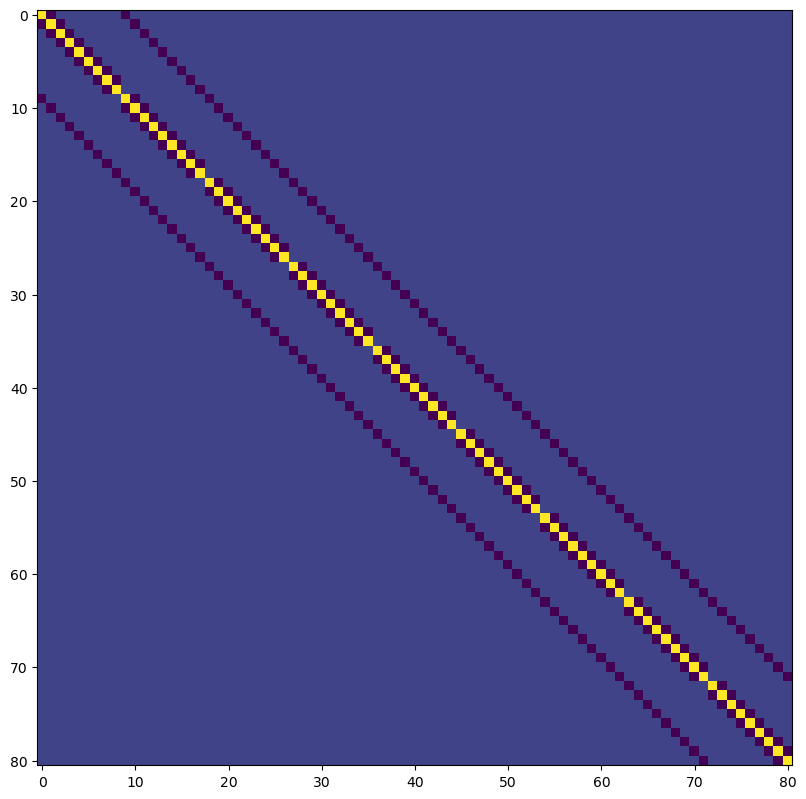

In [7]:
fig = plt.figure(figsize=(10,10), dpi=100)
plt.imshow(A)
plt.show()

直接解方程$Ax=b$就可以得到所有待求点的解

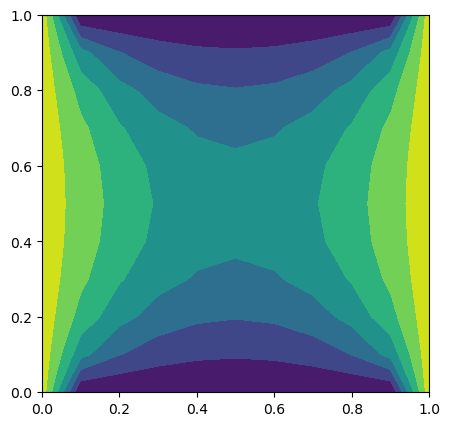

In [8]:
# 解方程
X = np.linalg.solve(A,b)

# 将解填入求解区域中
for i in range(x_n_grid):
    for j in range(y_n_grid):
        if not area[i, j]:
            value_matrix[i, j] = X[index_matrix[i, j], 0]
            
fig = plt.figure(figsize=(5, 5), dpi=100)
plt.contourf(x, y, value_matrix.T)
plt.show()

当系数矩阵很大时，直接解方程组很困难，可以使用迭代法

Jacobi迭代法一种简单的迭代法，其迭代格式为  
$$X^{(k+1)}=BX^{(k)}+g$$
其中  
$$B=I-D^{-1}A,g=D^{-1}b$$
$D$是$A$的对角元素组成对角矩阵

In [9]:
# Jacobi迭代用到的各个矩阵和向量
D_inv = np.linalg.inv(np.diag(np.diag(A)))
I = np.diag(np.ones(size))
B = I - D_inv.dot(A)
g = D_inv.dot(b)

# 迭代初始值
X0 = np.zeros((size, 1))

X = B.dot(X0) + g

# 迭代次数
k = 1

while np.max(abs(X-X0)) > 1e-6:
    X0 = X
    X = B.dot(X0) + g
    k += 1

print(k)

212


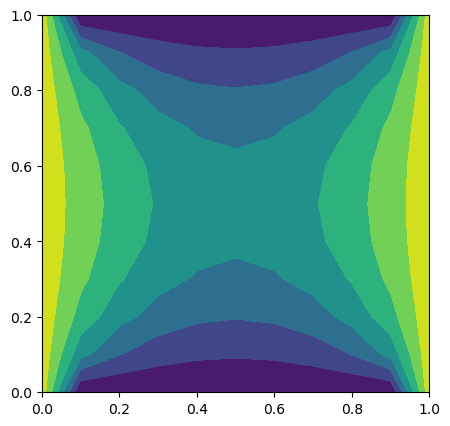

In [10]:
# 将解填入求解区域中
for i in range(x_n_grid):
    for j in range(y_n_grid):
        if not area[i, j]:
            value_matrix[i, j] = X[index_matrix[i, j], 0]
            
fig = plt.figure(figsize=(5, 5), dpi=100)
plt.contourf(x, y, value_matrix.T)
plt.show()

Gauss-Seidel迭代是Jacobi迭代改进后的方法，收敛速度更快，其迭代格式为  
$$X^{(k+1)}=SX^{(k)}+f$$
其中  
$$S=-(D+L)^{-1}U,f=(D+L)^{-1}b$$
$D$是$A$的对角部分，$U$和$L$分别是不包括对角部分的上三角和下三角部分

In [11]:
# Gauss-Seidel迭代用到的各个矩阵和向量
D = np.diag(np.diag(A))
U = np.triu(A, k=1)
L = np.tril(A, k=-1)
D_plus_L_inv = np.linalg.inv(D+L)
S = -D_plus_L_inv.dot(U)
f = D_plus_L_inv.dot(b)

# 迭代初始值
X0 = np.zeros((size, 1))

X = S.dot(X0) + f

# 迭代次数
k = 1

while np.max(abs(X-X0)) > 1e-6:
    X0 = X
    X = S.dot(X0) + f
    k += 1

print(k)

114


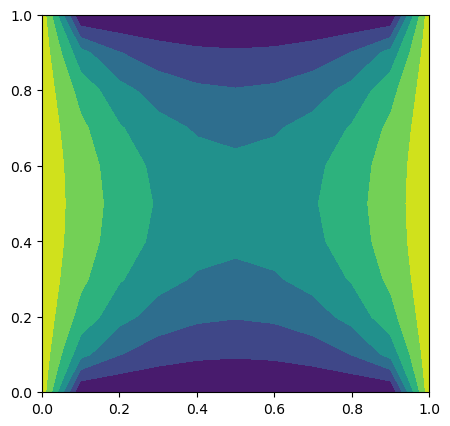

In [12]:
# 将解填入求解区域中
for i in range(x_n_grid):
    for j in range(y_n_grid):
        if not area[i, j]:
            value_matrix[i, j] = X[index_matrix[i, j] ,0]
            
fig = plt.figure(figsize=(5, 5), dpi=100)
plt.contourf(x, y, value_matrix.T)
plt.show()

Gauss-Seidel迭代可以进一步优化为松弛迭代，迭代格式为  
$$X^{(k+1)}=S_\omega X^{(k)}+f_\omega$$
其中  
$$S_\omega=(I+\omega D^{-1}L)^{-1}[(1-\omega)I-\omega D^{-1}U],f_\omega=\omega(I+\omega D^{-1}L)^{-1}D^{-1}b$$
$\omega$通常根据经验选取，当$1<\omega<2$时收敛较快，称为超松弛迭代  
计算正方形区域和矩形区域的第一类边值问题时，最佳的$\omega$可以在理论上确定

In [13]:
# 确定omega
omega = 2/(1+np.sin(np.pi/(x_n_grid-1)))

# 迭代需要的各个矩阵和向量
tmp = np.linalg.inv(I+omega*D_inv.dot(L))
S_omega = tmp.dot((1-omega)*I-omega*D_inv.dot(U))
f_omega = omega*tmp.dot(D_inv.dot(b))

# 迭代初始值
X0 = np.zeros((size, 1))

X = S_omega.dot(X0) + f_omega

# 迭代次数
k = 1

while np.max(abs(X-X0)) > 1e-6:
    X0 = X
    X = S_omega.dot(X0) + f_omega
    k += 1

print(k)

29


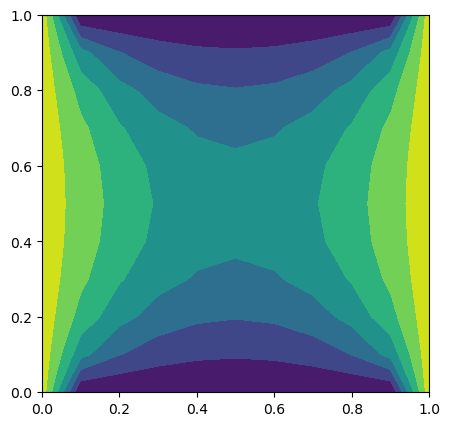

In [14]:
# 将解填入求解区域中
for i in range(x_n_grid):
    for j in range(y_n_grid):
        if not area[i, j]:
            value_matrix[i, j] = X[index_matrix[i, j], 0]
            
fig = plt.figure(figsize=(5, 5), dpi=100)
plt.contourf(x, y, value_matrix.T)
plt.show()

将上述内容定义为一个class以便调用

In [15]:
def edge_value(x, y):
    if x == 0.0 or x == 1.0:
        return 1.0
    if y == 0.0 or y == 1.0:
        return 0.0

def q(x, y):
    return 0.0

class poisson_solver:
    
    def __init__(self, x_range, y_range, h, edge_value, q):
        self.x_range = x_range
        self.y_range = y_range
        self.h = h
        self.x = np.arange(x_range[0], x_range[1] + h, h)
        self.y = np.arange(y_range[0], y_range[1] + h, h)
        self.x_n_grid = len(self.x)
        self.y_n_grid = len(self.y)
        self.area = np.full(shape=(self.x_n_grid, self.y_n_grid), fill_value=True)
        self.area[1: -1, 1: -1] = np.full(shape=(self.x_n_grid - 2, self.y_n_grid - 2), fill_value=False)
        self.index_matrix = np.zeros((self.x_n_grid, self.y_n_grid), dtype=int)
        self.value_matrix = np.zeros(shape=(self.x_n_grid, self.y_n_grid))
        self.q_matrix = np.zeros((self.x_n_grid, self.y_n_grid))
        
    def setup_values(self):
        k = 0
        for i in range(self.x_n_grid):
            for j in range(self.y_n_grid):
                if self.area[i, j]:
                    self.index_matrix[i, j] = -1
                    self.value_matrix[i, j] = edge_value(self.x[i], self.y[j])
                else:
                    self.index_matrix[i, j] = k
                    self.q_matrix[i, j] = q(self.x[i], self.y[j])
                    k += 1
        self.size = k 
    
    def setup_Ab(self):
        A = []
        b = []
        for i in range(self.x_n_grid):
            for j in range(self.y_n_grid):
                if not self.area[i, j]:
                    Aij = np.zeros(self.size)
                    bij = -0.25*self.h*self.h*self.q_matrix[i, j]
                    Aij[self.index_matrix[i, j]] = 1.0
                    if self.area[i-1, j]:
                        bij += 0.25*self.value_matrix[i-1, j]
                    else:
                        Aij[self.index_matrix[i-1, j]] = -0.25
                    if self.area[i+1, j]:
                        bij += 0.25*self.value_matrix[i+1, j]
                    else:
                        Aij[self.index_matrix[i+1, j]] = -0.25
                    if self.area[i, j-1]:
                        bij += 0.25*self.value_matrix[i, j-1]
                    else:
                        Aij[self.index_matrix[i, j-1]] = -0.25
                    if self.area[i, j+1]:
                        bij += 0.25*self.value_matrix[i, j+1]
                    else:
                        Aij[self.index_matrix[i, j+1]] = -0.25
                    A.append(Aij)
                    b.append([bij])
        self.A = np.array(A)
        self.b = np.array(b)
        
    def X2Matrix(self, X):
        for i in range(self.x_n_grid):
            for j in range(self.y_n_grid):
                if not self.area[i, j]:
                    self.value_matrix[i, j] = X[self.index_matrix[i, j], 0]
        
    def direct_solve(self):
        X = np.linalg.solve(self.A, self.b)
        self.X2Matrix(X)
        
    def jacobi_iterate(self):
        D_inv = np.linalg.inv(np.diag(np.diag(self.A)))
        I = np.diag(np.ones(self.size))
        B = I - D_inv.dot(self.A)
        g = D_inv.dot(self.b)
        X0 = np.zeros((self.size, 1))
        X = B.dot(X0) + g
        k = 1
        while np.max(abs(X-X0)) > 1e-6:
            X0 = X
            X = B.dot(X0) + g
            k += 1
        print("Converges in %d steps"%k)
        self.X2Matrix(X)
        
    def gauss_seidel_iterate(self):
        D = np.diag(np.diag(self.A))
        U = np.triu(self.A, k=1)
        L = np.tril(self.A, k=-1)
        D_plus_L_inv = np.linalg.inv(D+L)
        S = -D_plus_L_inv.dot(U)
        f = D_plus_L_inv.dot(self.b)
        X0 = np.zeros((self.size, 1))
        X = S.dot(X0) + f
        k = 1
        while np.max(abs(X-X0)) > 1e-6:
            X0 = X
            X = S.dot(X0) + f
            k += 1
        print("Convergs in %d steps"%k)
        self.X2Matrix(X)
            
    def relaxation_iterate(self, omega=1.5):
        I = np.diag(np.ones(self.size))
        D = np.diag(np.diag(self.A))
        U = np.triu(self.A, k=1)
        L = np.tril(self.A, k=-1)
        D_inv = np.linalg.inv(D)
        tmp = np.linalg.inv(I+omega*D_inv.dot(L))
        S_omega = tmp.dot((1-omega)*I-omega*D_inv.dot(U))            
        f_omega = omega*tmp.dot(D_inv.dot(self.b))
        X0 = np.zeros((self.size, 1))
        X = S_omega.dot(X0) + f_omega
        k = 1
        while np.max(abs(X-X0)) > 1e-6:
            X0 = X
            X = S_omega.dot(X0) + f_omega
            k += 1
        print("Converges in %d steps"%k)
        self.X2Matrix(X)


更密的划分可以得到精确度更高的数值解

In [16]:
solver = poisson_solver([0, 1], [0, 1], 0.025, edge_value, q)
solver.setup_values()
solver.setup_Ab()
solver.relaxation_iterate(omega=2/(1+np.sin(np.pi/(solver.x_n_grid-1))))

Converges in 107 steps


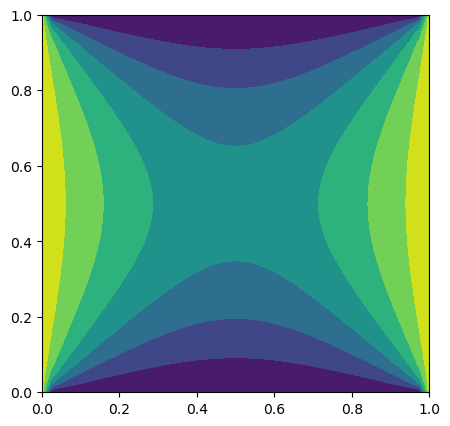

In [17]:
fig = plt.figure(figsize=(5, 5), dpi=100)
plt.contourf(solver.x, solver.y, solver.value_matrix.T)
plt.show()

如果求解区域有特殊的边界条件，就需要对几个矩阵进行修改  
现在新增一个边界条件，$\phi(0.5,0.5)=1$

In [18]:
i = j = int((solver.x_n_grid -1)/2)
solver.area[i, j] = True
solver.setup_values()
solver.value_matrix[i, j] = 1.0
solver.setup_Ab()
solver.relaxation_iterate(omega=2/(1+np.sin(np.pi/(solver.x_n_grid-1))))

Converges in 105 steps


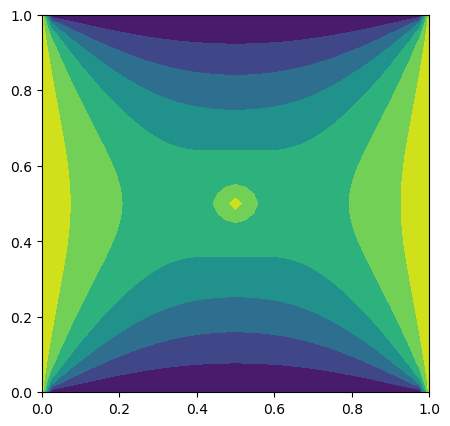

In [19]:
fig = plt.figure(figsize=(5, 5), dpi=100)
plt.contourf(solver.x, solver.y, solver.value_matrix.T)
plt.show()

最后我们再看一看Jacobi迭代的迭代矩阵，为了方便查看，将划分的步长改大

In [20]:
solver = poisson_solver([0, 1], [0, 1], 0.2, edge_value, q)
solver.setup_values()
solver.setup_Ab()

D_inv = np.linalg.inv(np.diag(np.diag(solver.A)))
I = np.diag(np.ones(solver.size))
B = I - D_inv.dot(solver.A)
g = D_inv.dot(solver.b)

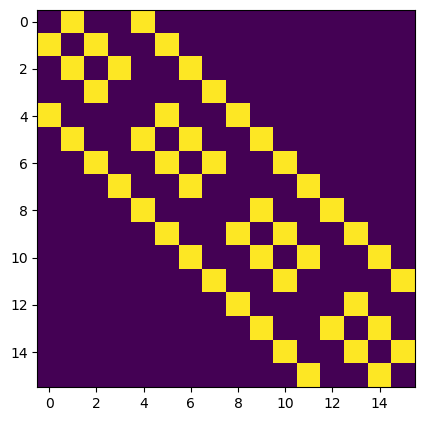

In [21]:
fig = plt.figure(figsize=(5, 5), dpi=100)
plt.imshow(B)
plt.show()

$B$矩阵每一列的和都小于或等于1，和小于1的列在$g$向量的对应位置有边界信息  
把矩阵视为一个特殊的转移概率矩阵，和等于1的列表示在求解区域内游走，和小于1的列表示有可能游走到边界  
Jacobi迭代$X^{(k+1)}=BX^{(k)}+g$可以理解为按转移概率矩阵随机游走的期望  
从这个角度看，随机游走和迭代法计算偏微分方程数值解的原理是相同的